In [5]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv('wfp_food_prices_ken2.csv')
df['date']=pd.to_datetime(df['date'])
df.head()

,date,district,market,commodity,unit,pricetype,currency,price,standardized_price
0,2006-01-15,Mombasa,Mombasa,Maize,90 KG,Wholesale,KES,1480.00,16.444444
1,2006-01-15,Mombasa,Mombasa,Beans,KG,Wholesale,KES,33.63,33.630000
2,2006-01-15,Mombasa,Mombasa,Beans,90 KG,Wholesale,KES,3246.00,36.066667
3,2006-01-15,Kitui,Kitui,Maize,KG,Retail,KES,17.00,17.000000
4,2006-01-15,Kitui,Kitui,Potatoes,50 KG,Wholesale,KES,1249.99,24.999800


In [63]:
nested_dict = {}

for a in range(0, len(df['pricetype'].unique())):
    pricetype_name = df['pricetype'].unique()[a]
    nested_dict[pricetype_name] = {}
    df_pricetype = df[df['pricetype']==pricetype_name]
    
    for b in range(0, len(df_pricetype['district'].unique())):
        region_name = df_pricetype['district'].unique()[b]
        nested_dict[pricetype_name][region_name] = {}

        df_region = df_pricetype[df_pricetype['district'] == region_name]

        
        for d in range(0, len(df_region['commodity'].unique())):
            item_name = df_region['commodity'].unique()[d]
            nested_dict[pricetype_name][region_name][item_name] = df_region[df_region['commodity'] == item_name]

# Access nested_dict as needed
nested_dict.keys()


dict_keys(['Wholesale', 'Retail'])

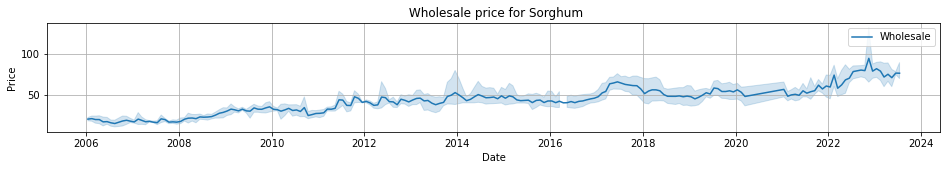

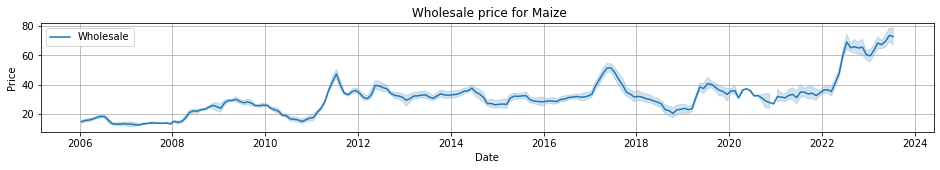

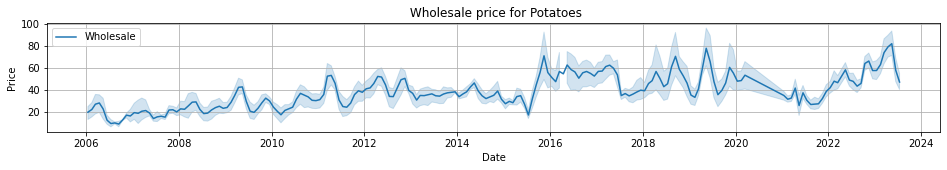

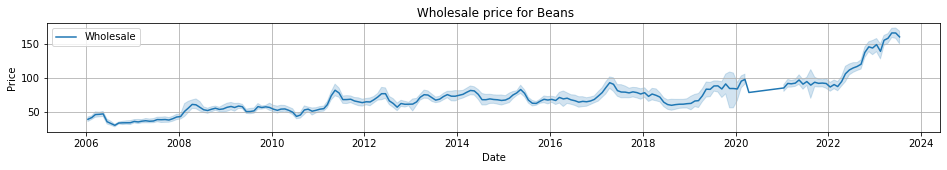

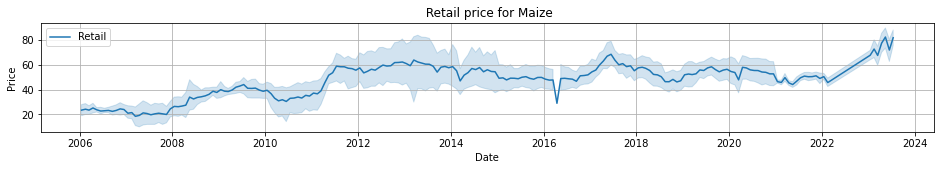

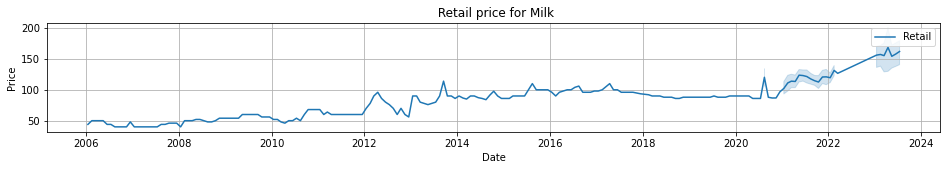

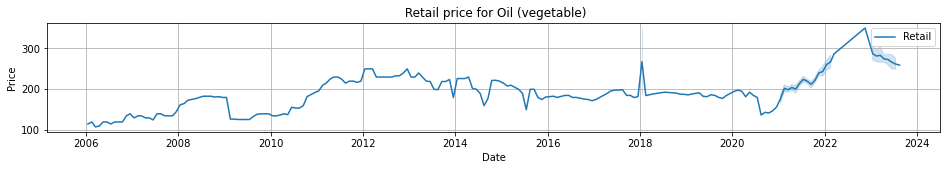

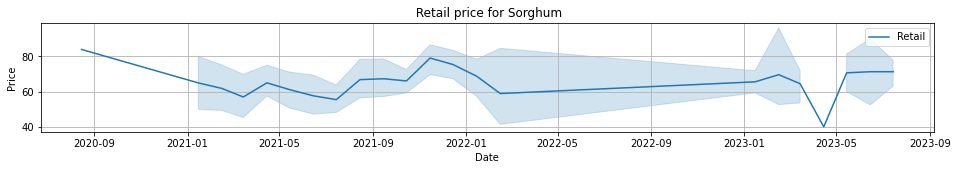

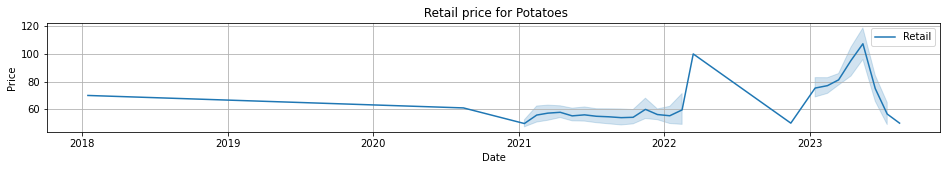

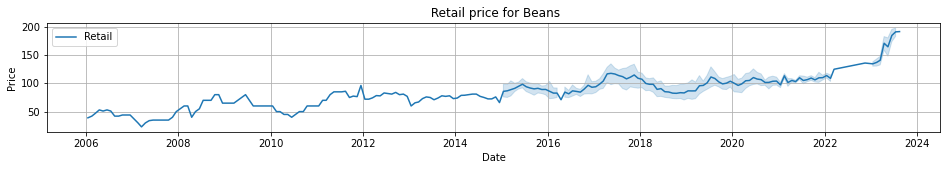

In [75]:
# Iterate through price types
for pricetype_name, pricetype_data in nested_dict.items():
    
    # Get a list of all unique commodities for the current price type
    unique_commodities = set(commodity for region_data in pricetype_data.values() for commodity in region_data.keys())
    
    # Iterate through unique commodities
    for commodity_name in unique_commodities:
        
        # Create an empty DataFrame to accumulate data for the current commodity
        df_commodity = pd.DataFrame()
        
        # Iterate through regions
        for region_name, region_data in pricetype_data.items():
            
            # Check if the commodity exists in the current region
            if commodity_name in region_data:
                # Append data for the current commodity in the current region to the DataFrame
                df_commodity = df_commodity.append(region_data[commodity_name], ignore_index=True)
        
        # Check if the DataFrame is not empty and contains 'date' and 'price' columns
        if not df_commodity.empty and 'date' in df_commodity.columns and 'price' in df_commodity.columns:
            # Plotting
            plt.figure(figsize=(16, 2))
            sns.lineplot(
                data=df_commodity,
                x='date',
                y='standardized_price',
                label=pricetype_name
            )
            plt.title(f' {pricetype_name} price for {commodity_name}')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.grid()
            plt.show()
        else:
            print(f"Skipping plot for {commodity_name} ({pricetype_name}): Empty or missing 'date'/'price' columns.")


In [47]:
nested_dict.keys()

dict_keys(['Wholesale', 'Retail'])

In [48]:
nested_dict['Wholesale'].keys()

dict_keys(['Mombasa', 'Kitui', 'Nairobi', 'Kisumu', 'Uasin Gishu', 'Nakuru', 'Nyeri', 'Kwale', 'Makueni', 'Garissa', 'Mandera', 'Baringo', 'Kajiado', 'West Pokot', 'Machakos', 'Meru South'])

In [49]:
nested_dict['Wholesale']['Kitui'].keys()

dict_keys(['Potatoes', 'Sorghum', 'Beans', 'Maize'])

In [74]:
nested_dict['Wholesale']['Kitui']['Maize']

,date,district,market,commodity,unit,pricetype,currency,price,standardized_price
6085,2021-02-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2700.0,30.000000
6460,2021-06-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2700.0,30.000000
6561,2021-07-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2700.0,30.000000
6682,2021-09-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2799.0,31.100000
6767,2021-10-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2975.0,33.055556
6860,2021-11-15,Kitui,Kitui town (Kitui),Maize,90 KG,Wholesale,KES,2997.0,33.300000
